In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

In [92]:
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

In [24]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'cividis' , font_scale = 1.1 
             , rc = {'figure.figsize' : (8 , 4)})

In [37]:
df = pd.read_csv('Ecommerce_Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().mean()*100

Email                   0.0
Address                 0.0
Avatar                  0.0
Avg. Session Length     0.0
Time on App             0.0
Time on Website         0.0
Length of Membership    0.0
Yearly Amount Spent     0.0
dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [41]:
df.drop(['Email' , 'Address'] , axis = 1 , inplace = True)

<AxesSubplot:xlabel='Avg. Session Length'>

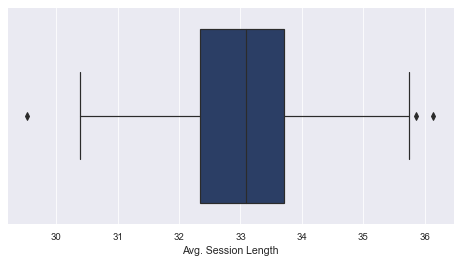

In [43]:
sns.boxplot(df['Avg. Session Length'])

<AxesSubplot:xlabel='Avg. Session Length', ylabel='Density'>

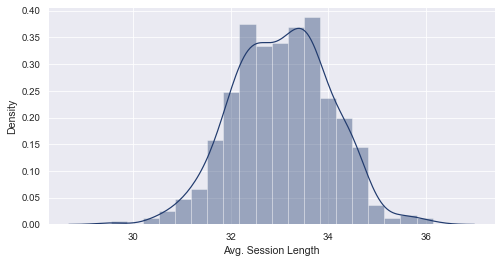

In [44]:
sns.distplot(df['Avg. Session Length'])

In [55]:
def Detecte_Outlier(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    maxw , minw = des['75%'] + (1.5 * IQR) , des['25%'] - (1.5*IQR)
    idx = data[ (data[col] > maxw) | (data[col] < minw)].index
    return idx
Detecte_Outlier(df , 'Time on App')

Int64Index([65, 309, 362, 442], dtype='int64')

In [60]:
df.drop(detect_outliers(df, 0 , ['Avg. Session Length']) , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Time on App'>

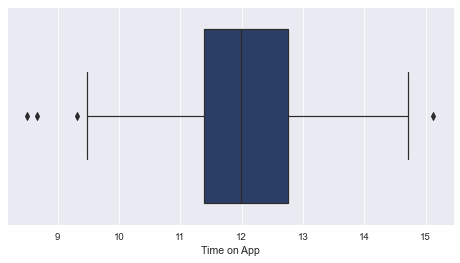

In [61]:
sns.boxplot(df['Time on App'])

In [62]:
df.drop(detect_outliers(df, 0 , ['Time on App']) , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Time on Website'>

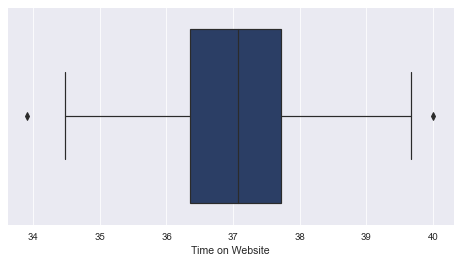

In [63]:
sns.boxplot(df['Time on Website'])

In [64]:
df.drop(detect_outliers(df, 0 , ['Time on Website']) , axis = 0 , inplace = True)

<AxesSubplot:xlabel='Length of Membership'>

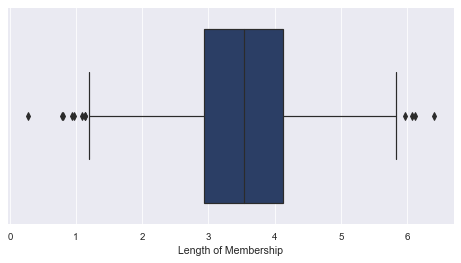

In [65]:
sns.boxplot(df['Length of Membership'])

In [66]:
df.drop(detect_outliers(df, 0 , ['Length of Membership']) , axis = 0 , inplace = True)

In [67]:
df.reset_index(inplace = True , drop = True)

In [68]:
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
474,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
475,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
476,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
477,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [70]:
df.drop(['Avatar'] , axis = 1 , inplace = True)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

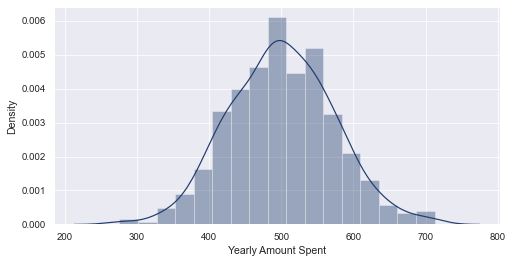

In [75]:
sns.distplot(df['Yearly Amount Spent'])

In [73]:
x = df.drop(['Yearly Amount Spent'] , axis = 1)
y = df['Yearly Amount Spent']

In [83]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2
                                                       , random_state = 3)

In [84]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
31,32.175501,13.387492,35.694175,4.343063
446,33.459619,12.664391,36.366843,1.726962
377,32.430839,13.887275,38.381956,3.772969
127,32.439770,12.424130,38.948825,4.920318
161,33.428747,10.636761,37.578835,2.926396
...,...,...,...,...
440,32.770492,11.371767,35.261498,4.034386
131,33.358398,12.703688,36.100914,2.724108
249,32.550527,13.041245,36.655208,3.456234
152,32.838100,12.364342,38.039109,3.309182


In [85]:
sclr = StandardScaler()

In [87]:
col = x_train.columns

In [88]:
x_train[col] = sclr.fit_transform(x_train)

In [90]:
x_test[col] = sclr.transform(x_test)

In [93]:
model = LinearRegression()

In [94]:
model.fit(x_train , y_train)

LinearRegression()

In [95]:
y_pred = model.predict(x_test)

In [96]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [99]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

10.425104950340588

In [100]:
mean_absolute_error(y_true = y_test , y_pred = y_pred)

8.107914263317172

In [101]:
r2_score(y_true = y_test , y_pred = y_pred)

0.9796397730223688

In [102]:
import joblib

In [103]:
joblib.dump(model , 'model.pkl')

['model.pkl']

In [104]:
model.coef_

array([24.28997383, 37.10333314,  0.51533805, 56.47143   ])

In [105]:
joblib.dump(sclr , 'sclr.pkl')

['sclr.pkl']